In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.utils.class_weight import compute_sample_weight
from scipy.optimize import curve_fit

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend

#import colormap
import matplotlib
from matplotlib import cm

plt.rc('font', size=14)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1.5

In [2]:
turbo_colormap_data = np.array(
[[0.18995,0.07176,0.23217],[0.19483,0.08339,0.26149],[0.19956,0.09498,0.29024],[0.20415,0.10652,0.31844],
[0.20860,0.11802,0.34607],[0.21291,0.12947,0.37314],[0.21708,0.14087,0.39964],[0.22111,0.15223,0.42558],
[0.22500,0.16354,0.45096],[0.22875,0.17481,0.47578],[0.23236,0.18603,0.50004],[0.23582,0.19720,0.52373],
[0.23915,0.20833,0.54686],[0.24234,0.21941,0.56942],[0.24539,0.23044,0.59142],[0.24830,0.24143,0.61286],
[0.25107,0.25237,0.63374],[0.25369,0.26327,0.65406],[0.25618,0.27412,0.67381],[0.25853,0.28492,0.69300],
[0.26074,0.29568,0.71162],[0.26280,0.30639,0.72968],[0.26473,0.31706,0.74718],[0.26652,0.32768,0.76412],
[0.26816,0.33825,0.78050],[0.26967,0.34878,0.79631],[0.27103,0.35926,0.81156],[0.27226,0.36970,0.82624],
[0.27334,0.38008,0.84037],[0.27429,0.39043,0.85393],[0.27509,0.40072,0.86692],[0.27576,0.41097,0.87936],
[0.27628,0.42118,0.89123],[0.27667,0.43134,0.90254],[0.27691,0.44145,0.91328],[0.27701,0.45152,0.92347],
[0.27698,0.46153,0.93309],[0.27680,0.47151,0.94214],[0.27648,0.48144,0.95064],[0.27603,0.49132,0.95857],
[0.27543,0.50115,0.96594],[0.27469,0.51094,0.97275],[0.27381,0.52069,0.97899],[0.27273,0.53040,0.98461],
[0.27106,0.54015,0.98930],[0.26878,0.54995,0.99303],[0.26592,0.55979,0.99583],[0.26252,0.56967,0.99773],
[0.25862,0.57958,0.99876],[0.25425,0.58950,0.99896],[0.24946,0.59943,0.99835],[0.24427,0.60937,0.99697],
[0.23874,0.61931,0.99485],[0.23288,0.62923,0.99202],[0.22676,0.63913,0.98851],[0.22039,0.64901,0.98436],
[0.21382,0.65886,0.97959],[0.20708,0.66866,0.97423],[0.20021,0.67842,0.96833],[0.19326,0.68812,0.96190],
[0.18625,0.69775,0.95498],[0.17923,0.70732,0.94761],[0.17223,0.71680,0.93981],[0.16529,0.72620,0.93161],
[0.15844,0.73551,0.92305],[0.15173,0.74472,0.91416],[0.14519,0.75381,0.90496],[0.13886,0.76279,0.89550],
[0.13278,0.77165,0.88580],[0.12698,0.78037,0.87590],[0.12151,0.78896,0.86581],[0.11639,0.79740,0.85559],
[0.11167,0.80569,0.84525],[0.10738,0.81381,0.83484],[0.10357,0.82177,0.82437],[0.10026,0.82955,0.81389],
[0.09750,0.83714,0.80342],[0.09532,0.84455,0.79299],[0.09377,0.85175,0.78264],[0.09287,0.85875,0.77240],
[0.09267,0.86554,0.76230],[0.09320,0.87211,0.75237],[0.09451,0.87844,0.74265],[0.09662,0.88454,0.73316],
[0.09958,0.89040,0.72393],[0.10342,0.89600,0.71500],[0.10815,0.90142,0.70599],[0.11374,0.90673,0.69651],
[0.12014,0.91193,0.68660],[0.12733,0.91701,0.67627],[0.13526,0.92197,0.66556],[0.14391,0.92680,0.65448],
[0.15323,0.93151,0.64308],[0.16319,0.93609,0.63137],[0.17377,0.94053,0.61938],[0.18491,0.94484,0.60713],
[0.19659,0.94901,0.59466],[0.20877,0.95304,0.58199],[0.22142,0.95692,0.56914],[0.23449,0.96065,0.55614],
[0.24797,0.96423,0.54303],[0.26180,0.96765,0.52981],[0.27597,0.97092,0.51653],[0.29042,0.97403,0.50321],
[0.30513,0.97697,0.48987],[0.32006,0.97974,0.47654],[0.33517,0.98234,0.46325],[0.35043,0.98477,0.45002],
[0.36581,0.98702,0.43688],[0.38127,0.98909,0.42386],[0.39678,0.99098,0.41098],[0.41229,0.99268,0.39826],
[0.42778,0.99419,0.38575],[0.44321,0.99551,0.37345],[0.45854,0.99663,0.36140],[0.47375,0.99755,0.34963],
[0.48879,0.99828,0.33816],[0.50362,0.99879,0.32701],[0.51822,0.99910,0.31622],[0.53255,0.99919,0.30581],
[0.54658,0.99907,0.29581],[0.56026,0.99873,0.28623],[0.57357,0.99817,0.27712],[0.58646,0.99739,0.26849],
[0.59891,0.99638,0.26038],[0.61088,0.99514,0.25280],[0.62233,0.99366,0.24579],[0.63323,0.99195,0.23937],
[0.64362,0.98999,0.23356],[0.65394,0.98775,0.22835],[0.66428,0.98524,0.22370],[0.67462,0.98246,0.21960],
[0.68494,0.97941,0.21602],[0.69525,0.97610,0.21294],[0.70553,0.97255,0.21032],[0.71577,0.96875,0.20815],
[0.72596,0.96470,0.20640],[0.73610,0.96043,0.20504],[0.74617,0.95593,0.20406],[0.75617,0.95121,0.20343],
[0.76608,0.94627,0.20311],[0.77591,0.94113,0.20310],[0.78563,0.93579,0.20336],[0.79524,0.93025,0.20386],
[0.80473,0.92452,0.20459],[0.81410,0.91861,0.20552],[0.82333,0.91253,0.20663],[0.83241,0.90627,0.20788],
[0.84133,0.89986,0.20926],[0.85010,0.89328,0.21074],[0.85868,0.88655,0.21230],[0.86709,0.87968,0.21391],
[0.87530,0.87267,0.21555],[0.88331,0.86553,0.21719],[0.89112,0.85826,0.21880],[0.89870,0.85087,0.22038],
[0.90605,0.84337,0.22188],[0.91317,0.83576,0.22328],[0.92004,0.82806,0.22456],[0.92666,0.82025,0.22570],
[0.93301,0.81236,0.22667],[0.93909,0.80439,0.22744],[0.94489,0.79634,0.22800],[0.95039,0.78823,0.22831],
[0.95560,0.78005,0.22836],[0.96049,0.77181,0.22811],[0.96507,0.76352,0.22754],[0.96931,0.75519,0.22663],
[0.97323,0.74682,0.22536],[0.97679,0.73842,0.22369],[0.98000,0.73000,0.22161],[0.98289,0.72140,0.21918],
[0.98549,0.71250,0.21650],[0.98781,0.70330,0.21358],[0.98986,0.69382,0.21043],[0.99163,0.68408,0.20706],
[0.99314,0.67408,0.20348],[0.99438,0.66386,0.19971],[0.99535,0.65341,0.19577],[0.99607,0.64277,0.19165],
[0.99654,0.63193,0.18738],[0.99675,0.62093,0.18297],[0.99672,0.60977,0.17842],[0.99644,0.59846,0.17376],
[0.99593,0.58703,0.16899],[0.99517,0.57549,0.16412],[0.99419,0.56386,0.15918],[0.99297,0.55214,0.15417],
[0.99153,0.54036,0.14910],[0.98987,0.52854,0.14398],[0.98799,0.51667,0.13883],[0.98590,0.50479,0.13367],
[0.98360,0.49291,0.12849],[0.98108,0.48104,0.12332],[0.97837,0.46920,0.11817],[0.97545,0.45740,0.11305],
[0.97234,0.44565,0.10797],[0.96904,0.43399,0.10294],[0.96555,0.42241,0.09798],[0.96187,0.41093,0.09310],
[0.95801,0.39958,0.08831],[0.95398,0.38836,0.08362],[0.94977,0.37729,0.07905],[0.94538,0.36638,0.07461],
[0.94084,0.35566,0.07031],[0.93612,0.34513,0.06616],[0.93125,0.33482,0.06218],[0.92623,0.32473,0.05837],
[0.92105,0.31489,0.05475],[0.91572,0.30530,0.05134],[0.91024,0.29599,0.04814],[0.90463,0.28696,0.04516],
[0.89888,0.27824,0.04243],[0.89298,0.26981,0.03993],[0.88691,0.26152,0.03753],[0.88066,0.25334,0.03521],
[0.87422,0.24526,0.03297],[0.86760,0.23730,0.03082],[0.86079,0.22945,0.02875],[0.85380,0.22170,0.02677],
[0.84662,0.21407,0.02487],[0.83926,0.20654,0.02305],[0.83172,0.19912,0.02131],[0.82399,0.19182,0.01966],
[0.81608,0.18462,0.01809],[0.80799,0.17753,0.01660],[0.79971,0.17055,0.01520],[0.79125,0.16368,0.01387],
[0.78260,0.15693,0.01264],[0.77377,0.15028,0.01148],[0.76476,0.14374,0.01041],[0.75556,0.13731,0.00942],
[0.74617,0.13098,0.00851],[0.73661,0.12477,0.00769],[0.72686,0.11867,0.00695],[0.71692,0.11268,0.00629],
[0.70680,0.10680,0.00571],[0.69650,0.10102,0.00522],[0.68602,0.09536,0.00481],[0.67535,0.08980,0.00449],
[0.66449,0.08436,0.00424],[0.65345,0.07902,0.00408],[0.64223,0.07380,0.00401],[0.63082,0.06868,0.00401],
[0.61923,0.06367,0.00410],[0.60746,0.05878,0.00427],[0.59550,0.05399,0.00453],[0.58336,0.04931,0.00486],
[0.57103,0.04474,0.00529],[0.55852,0.04028,0.00579],[0.54583,0.03593,0.00638],[0.53295,0.03169,0.00705],
[0.51989,0.02756,0.00780],[0.50664,0.02354,0.00863],[0.49321,0.01963,0.00955],[0.47960,0.01583,0.01055]])


def RGBToPyCmap(rgbdata):
    nsteps = rgbdata.shape[0]
    stepaxis = np.linspace(0, 1, nsteps)

    rdata=[]; gdata=[]; bdata=[]
    for istep in range(nsteps):
        r = rgbdata[istep,0]
        g = rgbdata[istep,1]
        b = rgbdata[istep,2]
        rdata.append((stepaxis[istep], r, r))
        gdata.append((stepaxis[istep], g, g))
        bdata.append((stepaxis[istep], b, b))

    mpl_data = {'red':   rdata,
                 'green': gdata,
                 'blue':  bdata}

    return mpl_data


mpl_data = RGBToPyCmap(turbo_colormap_data)
plt.register_cmap(name='turbo', data=mpl_data, lut=turbo_colormap_data.shape[0])

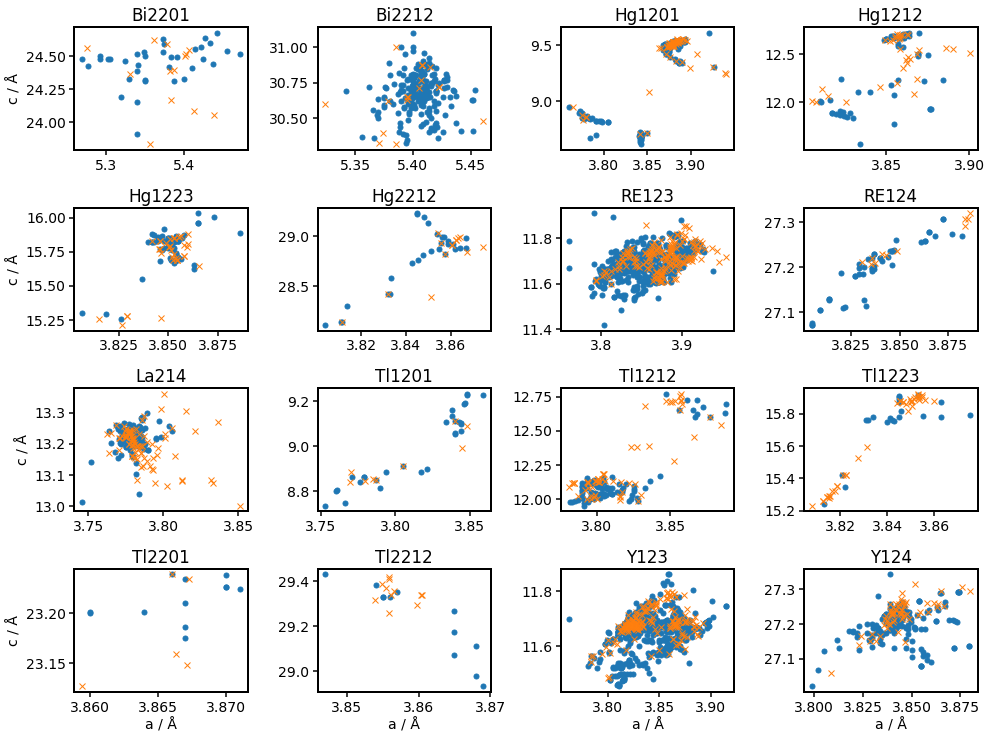

In [3]:
df_super = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/super_apical.csv", index_col=0)

lata_super = df_super["lata :"].values.T
latc_super = df_super["latc :"].values.T
family_super = df_super["str3 :"].values

df_icsd = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/icsd_cleaned.csv", index_col=0)

latc_icsd = df_icsd["latc :"].values
lata_icsd = df_icsd["lata :"].values
family_icsd = df_icsd["str3 :"].values

# sqrt2 = np.sqrt(2)
# ortho = lambda x: x/sqrt2 if x > 5 else x
# compare = np.vectorize(lambda x: x/sqrt2 if x > 5 else x)
# lata_super = compare(lata_super)
# lata_icsd = compare(lata_icsd)

families = df_super["str3 :"].unique()
families.sort()

num = len(families)
rows = 4
cols = int((num+rows-1)/rows)

scale = 3.5/cols

fig_2d, ax_2d = plt.subplots(cols, rows, squeeze=False, figsize=(scale*4*cols,scale*rows*3))

for i, ftype in enumerate(families):
    j, k = divmod(i, rows)
    
    mask_super = np.where(family_super==ftype)
    a_super = lata_super[mask_super] 
    c_super = latc_super[mask_super] 
    
    mask_icsd = np.where(family_icsd==ftype)
    a_icsd = lata_icsd[mask_icsd]
    c_icsd = latc_icsd[mask_icsd]
    
    ax_2d[j,k].plot(a_super, c_super, 'o', markersize=5)
    ax_2d[j,k].plot(a_icsd, c_icsd, 'x')
    if ftype == "T":
        ax_2d[j,k].set_title("La214")
    else:
        ax_2d[j,k].set_title(ftype)

ax_2d[0,0].set_ylabel("c / Å")
ax_2d[1,0].set_ylabel("c / Å")
ax_2d[2,0].set_ylabel("c / Å")
ax_2d[3,0].set_xlabel("a / Å")
ax_2d[3,0].set_ylabel("c / Å")
ax_2d[3,1].set_xlabel("a / Å")
ax_2d[3,2].set_xlabel("a / Å")
ax_2d[3,3].set_xlabel("a / Å")


fig_2d.tight_layout()
plt.show()
fig_2d.savefig("pyplot/overlap.pdf")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


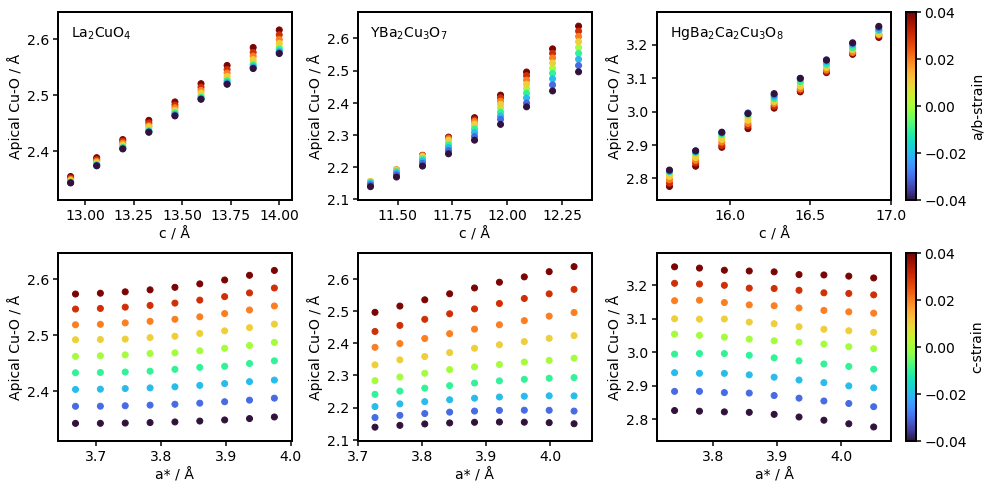

In [4]:
df_lco = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/dft/lco214-all.csv", index_col=0)
df_y123 = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/dft/y123-all.csv", index_col=0)
df_hg1223 = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/dft/hg1223-all.csv", index_col=0)

fig = plt.figure(figsize=(14,7), constrained_layout=False)
gs1 = fig.add_gridspec(nrows=2, ncols=3, left=0.06, right=1.05, 
                       bottom=0.10, top=0.95, wspace=0.28, hspace=0.28)
ax0 = fig.add_subplot(gs1[0, 0])
ax1 = fig.add_subplot(gs1[0, 1])
ax2 = fig.add_subplot(gs1[0, 2])
ax3 = fig.add_subplot(gs1[1, 0])
ax4 = fig.add_subplot(gs1[1, 1])
ax5 = fig.add_subplot(gs1[1, 2])

img0 = ax0.scatter(df_lco["c"], df_lco["cuoa"], c=df_lco["abstrain"], cmap="turbo")
ax0.set_ylabel('Apical Cu-O / Å')
ax0.set_xlabel('c / Å')
# ax0.set_xlim((12.7,14.2))
# ax0.set_ylim((2.3,2.65))

ax1.scatter(df_y123["c"], df_y123["cuoa"], c=df_y123["abstrain"], cmap="turbo")
ax1.set_ylabel('Apical Cu-O / Å')
ax1.set_xlabel('c / Å')
# ax1.set_xlim((11.2,12.5))
# ax1.set_ylim((2.05,2.7))

ax2.scatter(df_hg1223["c"], df_hg1223["cuoa"], c=df_hg1223["abstrain"], cmap="turbo")
ax2.set_ylabel('Apical Cu-O / Å')
ax2.set_xlabel('c / Å')
# ax2.set_xlim((15.4,17.2))
# ax2.set_ylim((2.7,3.3))

cb1 = fig.colorbar(img0, ax=[ax0, ax1, ax2], fraction=0.15, pad=0.015)
cb1.set_label('a/b-strain', rotation=90)

img3 = ax3.scatter((df_lco["a"]+df_lco["b"])/2, df_lco["cuoa"], c=df_lco["zstrain"], cmap="turbo")
ax3.set_ylabel('Apical Cu-O / Å')
ax3.set_xlabel('a* / Å')

ax4.scatter((df_y123["a"]+df_y123["b"])/2, df_y123["cuoa"], c=df_y123["zstrain"], cmap="turbo")
ax4.set_ylabel('Apical Cu-O / Å')
ax4.set_xlabel('a* / Å')

ax5.scatter((df_hg1223["a"]+df_hg1223["b"])/2, df_hg1223["cuoa"], c=df_hg1223["zstrain"], cmap="turbo")
ax5.set_ylabel('Apical Cu-O / Å')
ax5.set_xlabel('a* / Å')

cb2 = fig.colorbar(img3, ax=[ax3, ax4, ax5], fraction=0.15, pad=0.015)
cb2.set_label('c-strain', rotation=90)

ax0.legend(title=r"$\mathrm{La_{2}CuO_{4}}$", loc='upper left', frameon=False)
ax1.legend(title=r"$\mathrm{YBa_{2}Cu_{3}O_{7}}$", loc='upper left', frameon=False)
ax2.legend(title=r"$\mathrm{HgBa_{2}Ca_{2}Cu_{3}O_{8}}$", loc='upper left', frameon=False)

# fig.tight_layout()
plt.show()
fig.savefig("pyplot/dft.pdf")

[ 0.58688008 -0.82706859 -0.02164266  0.03128713  0.02885751] 0.01738551223824091
[-2.3441409   3.18710209  0.08379471 -0.27690399  0.10356289] 0.770536829275745
[ 0.06488925  0.0263973  -0.00153993 -0.04858693  0.04036318] 0.0073068702697731075


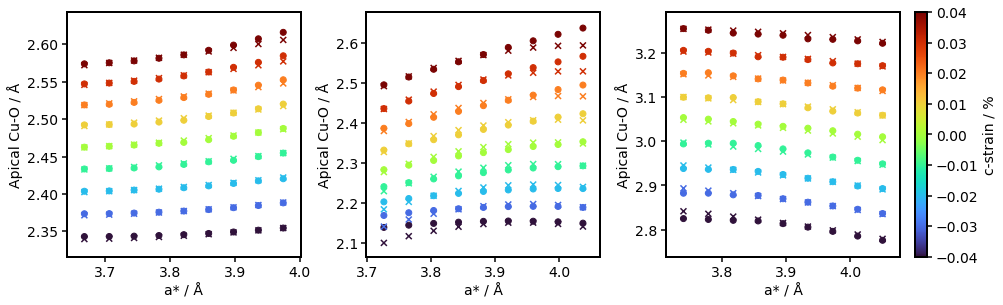

In [5]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.kernel_ridge import KernelRidge

# huber = LinearRegression()
# huber = KernelRidge(kernel='rbf')
huber = HuberRegressor()

huber.fit(np.array([df_lco["c"], (df_lco["a"]+df_lco["b"])/2]).T , df_lco["cuoa"])

# print(huber.coef_, huber.intercept_)

# hg [ 0.33039674 -0.14097288] -1.800647835484054
# y [0.44739168 0.2364648 ] -3.880010710151496
# lco [0.22585078 0.08374791] -0.8901624468736653

fig = plt.figure(figsize=(14,4), constrained_layout=False)
gs1 = fig.add_gridspec(nrows=1, ncols=3, left=0.06, right=1.05, 
                       bottom=0.10, top=0.95, wspace=0.28, hspace=0.28)
ax3 = fig.add_subplot(gs1[0, 0])
ax4 = fig.add_subplot(gs1[0, 1])
ax5 = fig.add_subplot(gs1[0, 2])

lco_fea = np.array([
                df_lco["c"],
                (df_lco["a"]+df_lco["b"]),
                df_lco["c"]**2,
                (df_lco["a"]+df_lco["b"])**2,
                df_lco["c"]*(df_lco["a"]+df_lco["b"]),
            ]).T

img3 = ax3.scatter((df_lco["a"]+df_lco["b"])/2, df_lco["cuoa"], c=df_lco["zstrain"], cmap="turbo")
huber.fit(lco_fea, df_lco["cuoa"])
ax3.scatter(
    (df_lco["a"]+df_lco["b"])/2, 
    huber.predict(lco_fea), 
    c=df_lco["zstrain"], marker='x', cmap="turbo"
)
ax3.set_ylabel('Apical Cu-O / Å')
ax3.set_xlabel('a* / Å')

print(huber.coef_, huber.intercept_)

y123_fea = np.array([
                df_y123["c"],
                (df_y123["a"]+df_y123["b"]),
                df_y123["c"]**2,
                (df_y123["a"]+df_y123["b"])**2,
                df_y123["c"]*(df_y123["a"]+df_y123["b"]),
            ]).T

ax4.scatter((df_y123["a"]+df_y123["b"])/2, df_y123["cuoa"], c=df_y123["zstrain"], cmap="turbo")
huber.fit(y123_fea, df_y123["cuoa"])
ax4.scatter(
    (df_y123["a"]+df_y123["b"])/2, 
    huber.predict(y123_fea), 
    c=df_y123["zstrain"], marker='x', cmap="turbo"
)
ax4.set_ylabel('Apical Cu-O / Å')
ax4.set_xlabel('a* / Å')

print(huber.coef_, huber.intercept_)

hg1223_fea = np.array([
                    df_hg1223["c"],
                    (df_hg1223["a"]+df_hg1223["b"]),
                    df_hg1223["c"]**2,
                    (df_hg1223["a"]+df_hg1223["b"])**2,
                    df_hg1223["c"]*(df_hg1223["a"]+df_hg1223["b"]),
                ]).T

ax5.scatter((df_hg1223["a"]+df_hg1223["b"])/2, df_hg1223["cuoa"], c=df_hg1223["zstrain"], cmap="turbo")
huber.fit(hg1223_fea, df_hg1223["cuoa"])
ax5.scatter(
    (df_hg1223["a"]+df_hg1223["b"])/2, 
    huber.predict(hg1223_fea), 
    c=df_hg1223["zstrain"], marker='x', cmap="turbo"
)
ax5.set_ylabel('Apical Cu-O / Å')
ax5.set_xlabel('a* / Å')

print(huber.coef_, huber.intercept_)

cb2 = fig.colorbar(img3, ax=[ax3, ax4, ax5], fraction=0.15, pad=0.015)
cb2.set_label('c-strain / %', rotation=90)

# ax0.legend(title=r"$\mathrm{La_{2}CuO_{4}}$", loc='upper left', frameon=False)
# ax1.legend(title=r"$\mathrm{YBa_{2}Cu_{3}O_{7}}$", loc='upper left', frameon=False)
# ax2.legend(title=r"$\mathrm{HgBa_{2}Ca_{2}Cu_{3}O_{8}}$", loc='upper left', frameon=False)

# fig.tight_layout()
plt.show()
fig.savefig("pyplot/dft.pdf")

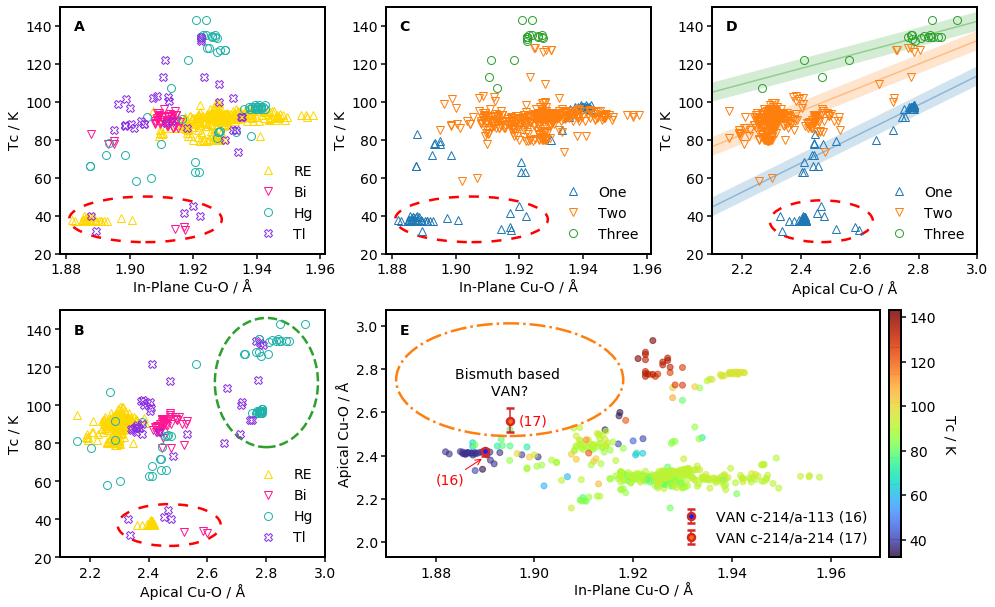

In [6]:
df_sc_top = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/super_top.csv", index_col=0)

latc_sc_top = df_sc_top["latc :"].values.T
lata_sc_top = df_sc_top["lata :"].values.T
api_sc_top = df_sc_top["cu-o_a :"].values.T
plnr_sc_top = df_sc_top["cu-o_p :"].values.T
tc_sc_top = df_sc_top["tc :"].values.T
family_sc_top = df_sc_top["str3 :"].values
weight_sc_top = compute_sample_weight('balanced', df_sc_top["str3 :"])
comp_sc_top = df_sc_top["composition :"].values.tolist()
ref_sc_top = df_sc_top.index

fig = plt.figure(figsize=(14,9), constrained_layout=False)
gs1 = fig.add_gridspec(nrows=2, ncols=3, left=0.06, right=0.97, 
                       bottom=0.10, top=0.95, wspace=0.23, hspace=0.23)
ax0 = fig.add_subplot(gs1[0, 1])
ax1 = fig.add_subplot(gs1[0, 2])
ax2 = fig.add_subplot(gs1[0, 0])
ax3 = fig.add_subplot(gs1[1, 0])
ax5 = fig.add_subplot(gs1[1, 1:])

families = ["One", "Two", "Three"]
types = ["RE","Bi", "Hg", "Tl",]
markers = ['^','v', 'o', 'X']
tab_col = ["tab:blue", "tab:orange", "tab:green"]
alt_colours = ["gold","deeppink","lightseagreen","blueviolet"]
ms = 8
alt_dash=(8, (4, 2, 0, 2))

## In-Plane by layers 

for fam, mark, col in zip(families, markers, tab_col):
    mask = np.asarray(df_sc_top["layers :"] == fam).nonzero()
    ax0.plot(plnr_sc_top[mask], tc_sc_top[mask],
                label=fam,
                marker=mark,
                markersize=ms,
                linestyle="None",
                fillstyle="none",
                color=col,
            )

ax0.set_ylabel('Tc / K')
ax0.set_ylim((20,150))
ax0.set_xlabel('In-Plane Cu-O / Å')
# ax0.set_xlim((1.87,1.98))
ax0.legend(loc=4, frameon=False)

shade = matplotlib.patches.Ellipse((1.905, 38), .048, 24, 
                                   linestyle=alt_dash, linewidth=2.5,
                                   facecolor="none", edgecolor="red")
ax0.add_artist(shade)

leg = Legend(ax0, handles=[], labels=[], title=r"$\bf{C}$",
             loc='upper left', frameon=False)
ax0.add_artist(leg)

## Apical by layers 

for fam, mark, col in zip(families, markers, tab_col):
    mask = np.asarray(df_sc_top["layers :"] == fam).nonzero()
    ax1.plot(api_sc_top[mask], tc_sc_top[mask],
                label=fam,
                marker=mark,
                markersize=ms,
                linestyle="None",
#                 facecolors='none'
                fillstyle="none",
                color=col,
            )
    
    X = api_sc_top[mask]
    y = tc_sc_top[mask]
    w = weight_sc_top[mask]

    t_mask = np.where(y>50)
    
    X = X[t_mask].reshape(-1,1)
    y = y[t_mask]
    w = weight_sc_top[t_mask]
    
    xi = np.linspace(2.0, 3.0, 100).reshape(-1,1)
    
#     f = lambda x, *p: np.polyval(p, x)
#     p, cov = curve_fit(f, X.ravel(), y, [1, 1])
#     ps = np.random.multivariate_normal(p, cov, 10000)
#     ysample = np.asarray([f(xi, *pi) for pi in ps])
#     lower = np.percentile(ysample, 2.5, axis=0)
#     upper = np.percentile(ysample, 97.5, axis=0)
#     y_fit = np.poly1d(p)(xi)

    lin = LinearRegression()
    
    lin.fit(X, y, w)
    
    y_fit = lin.predict(xi)

    ax1.plot(xi, y_fit, alpha=0.4)
    shade = 5
    ax1.fill_between(xi.ravel(), y_fit+shade, y_fit-shade, alpha=0.2)

    
ax1.set_ylabel('Tc / K')
ax1.set_ylim((20,150))
ax1.set_xlabel('Apical Cu-O / Å')
ax1.set_xlim((2.1,3.0))
ax1.legend(loc=4, frameon=False)  

shade = matplotlib.patches.Ellipse((2.47, 37), .35, 22, 
                                   linestyle=alt_dash, linewidth=2.5,
                                   facecolor="none", edgecolor="red")
ax1.add_artist(shade)

leg = Legend(ax1, handles=[], labels=[], title=r"$\bf{D}$",
             loc='upper left', frameon=False,)
ax1.add_artist(leg)

## In-Plane by cation

for fam, mark, col in zip(types, markers, alt_colours):
    mask = np.asarray(df_sc_top["types :"] == fam).nonzero()
    ax2.plot(plnr_sc_top[mask], tc_sc_top[mask],
                label=fam,
                marker=mark,
                markersize=ms,
                color=col,
                linestyle="None",
                fillstyle="none",
            )

ax2.set_ylabel('Tc / K')
ax2.set_ylim((20,150))
ax2.set_xlabel('In-Plane Cu-O / Å')
# ax2.set_xlim((1.87,1.98))
ax2.legend(loc=4, frameon=False)

shade = matplotlib.patches.Ellipse((1.905, 38), .048, 24, 
                                   linestyle=alt_dash, linewidth=2.5,
                                   facecolor="none", edgecolor="red")
ax2.add_artist(shade)

leg = Legend(ax2, handles=[], labels=[], title=r"$\bf{A}$",
             loc='upper left', frameon=False)
ax2.add_artist(leg)


## Apical by cation


for fam, mark, col in zip(types, markers, alt_colours):
    mask = np.asarray(df_sc_top["types :"] == fam).nonzero()
    ax3.plot(api_sc_top[mask], tc_sc_top[mask],
                label=fam,
                marker=mark,
                markersize=ms,
                color=col,
                linestyle="None",
                fillstyle="none",
            )
    
ax3.set_ylabel('Tc / K')
ax3.set_ylim((20,150))
ax3.set_xlabel('Apical Cu-O / Å')
ax3.set_xlim((2.1,3.0))
ax3.legend(loc=4, frameon=False)  

shade = matplotlib.patches.Ellipse((2.47, 37), .35, 22, 
                                   linestyle=alt_dash, linewidth=2.5,
                                   facecolor="none", edgecolor="red")
ax3.add_artist(shade)

shade = matplotlib.patches.Ellipse((2.8, 112), .35, 68, 
                                   linestyle='--', linewidth=2.5,
                                   facecolor="none", edgecolor="tab:green")
ax3.add_artist(shade)

leg = Legend(ax3, handles=[], labels=[], title=r"$\bf{B}$",
             loc='upper left', frameon=False)
ax3.add_artist(leg)

# Plot in-plane vs api coloured by Tc

# for fam, mark in zip(families, markers):
for fam in families:
    mask = np.asarray(df_sc_top["layers :"] == fam).nonzero()
    img = ax5.scatter(plnr_sc_top[mask], api_sc_top[mask], 
#                       s=40, 
#                       marker=mark,
                      alpha=0.6,
                      c=tc_sc_top[mask],
                      cmap="turbo",
                      vmin=np.min(tc_sc_top), vmax=np.max(tc_sc_top),
#                       facecolor='none',
#                       edgecolors='face',
#                       label=fam,
                     )

ax5.set_xlabel('In-Plane Cu-O / Å')
ax5.set_xlim((1.87, 1.97))
ax5.set_ylabel('Apical Cu-O / Å')
ax5.set_ylim((1.93,3.07))
cb = fig.colorbar(img, ax=[ax5], fraction=0.15, pad=0.015)
cb.set_label('Tc / K', rotation=270, labelpad=20, )

#normalize item number values to colormap
norm = matplotlib.colors.Normalize(vmin=np.min(tc_sc_top), vmax=np.max(tc_sc_top))

#colormap possible values = viridis, jet, spectral
c_50 = cm.jet(norm(50)) 
c_120 = cm.jet(norm(120)) 

ax5.errorbar((3.78/2), (2.42), yerr=np.array((0.02, 0.01)).reshape(-1,1),
    linestyle="None",
    marker='o',
    markersize=7,
    capsize=4,   
    color=c_50,
    ecolor='tab:red',
    markeredgecolor='tab:red',
    markeredgewidth=2.5,
#     color='tab:red',
    label="VAN c-214/a-113 (16)"
    )

ax5.errorbar((3.79/2), (2.56), yerr=np.array((0.05, 0.06)).reshape(-1,1),
    linestyle="None",
    marker='o',
    markersize=7,
    capsize=4,
    color=c_120,
    ecolor='tab:red',
    markeredgecolor='tab:red',
    markeredgewidth=2.5,
#     color='tab:red',
#     fillstyle="none",
    label="VAN c-214/a-214 (17)"
    )

arrows = {
    "arrowstyle": "->",
#     "mutation_scale": 1.7,
    "color": "r"
}

ax5.annotate("(16)", (1.8897,2.39), (1.88,2.27), color="r", arrowprops=arrows)
ax5.annotate("(17)", (1.8968,2.54), color="r")

shade = matplotlib.patches.Ellipse((1.895,2.75), .046, .52, 
                                   linestyle='-.', linewidth=2.5,
                                   facecolor="none", edgecolor="tab:orange")
ax5.add_artist(shade)

ax5.annotate("Bismuth based\n        VAN?", (1.884,2.68))

ax5.legend(loc='lower right', frameon=False,
           facecolor='white', framealpha=1,
#            bbox_to_anchor=(1.868, 2.95), bbox_transform=ax5.transData,
          )
leg = Legend(ax5, handles=[], labels=[], title=r"$\bf{E}$",
             loc='upper left', frameon=False)
ax5.add_artist(leg)


plt.show()
fig.savefig("pyplot/trends.pdf")